<a href="https://colab.research.google.com/github/Suraj1912/Parkinson-Disease-Classifier/blob/main/pd_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import pickle

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier  
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [2]:
from google.colab import files

#Importing Dataset

In [37]:
data = files.upload()

Saving pd_speech_features.csv to pd_speech_features (1).csv


In [4]:
import io

In [38]:
dataset = pd.read_csv(io.BytesIO(data['pd_speech_features.csv']))

In [6]:
dataset.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,rapJitter,ppq5Jitter,ddpJitter,locShimmer,locDbShimmer,apq3Shimmer,apq5Shimmer,apq11Shimmer,ddaShimmer,meanAutoCorrHarmonicity,meanNoiseToHarmHarmonicity,meanHarmToNoiseHarmonicity,minIntensity,maxIntensity,meanIntensity,f1,f2,f3,f4,b1,b2,b3,b4,GQ_prc5_95,GQ_std_cycle_open,GQ_std_cycle_closed,GNE_mean,GNE_std,GNE_SNR_TKEO,...,tqwt_skewnessValue_dec_34,tqwt_skewnessValue_dec_35,tqwt_skewnessValue_dec_36,tqwt_kurtosisValue_dec_1,tqwt_kurtosisValue_dec_2,tqwt_kurtosisValue_dec_3,tqwt_kurtosisValue_dec_4,tqwt_kurtosisValue_dec_5,tqwt_kurtosisValue_dec_6,tqwt_kurtosisValue_dec_7,tqwt_kurtosisValue_dec_8,tqwt_kurtosisValue_dec_9,tqwt_kurtosisValue_dec_10,tqwt_kurtosisValue_dec_11,tqwt_kurtosisValue_dec_12,tqwt_kurtosisValue_dec_13,tqwt_kurtosisValue_dec_14,tqwt_kurtosisValue_dec_15,tqwt_kurtosisValue_dec_16,tqwt_kurtosisValue_dec_17,tqwt_kurtosisValue_dec_18,tqwt_kurtosisValue_dec_19,tqwt_kurtosisValue_dec_20,tqwt_kurtosisValue_dec_21,tqwt_kurtosisValue_dec_22,tqwt_kurtosisValue_dec_23,tqwt_kurtosisValue_dec_24,tqwt_kurtosisValue_dec_25,tqwt_kurtosisValue_dec_26,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,0.000018,0.00067,0.00129,0.00200,0.05883,0.517,0.03011,0.03496,0.04828,0.09034,0.970805,0.036223,18.995,69.997496,76.088046,72.465512,539.342735,1031.849040,2447.162183,3655.054806,101.092218,83.147440,255.214830,396.643631,0.77778,11.7245,2.8277,1.17300,0.26512,0.083127,...,0.071728,0.010352,-2.73030,66.5007,36.9934,26.3508,51.9577,21.5451,8.2488,8.0024,6.9635,6.9189,5.0622,4.6068,7.7218,2.7224,2.4171,2.9383,4.2077,3.1541,2.8531,2.7496,2.1550,2.9457,2.1993,1.9830,1.8314,2.0062,1.6058,1.5466,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,0.000016,0.00052,0.00112,0.00157,0.05516,0.502,0.02320,0.03675,0.06195,0.06961,0.984322,0.017974,21.497,67.415903,73.046374,71.528945,564.363614,1016.367294,2383.565201,3498.681572,58.465428,86.487292,248.357127,218.229722,0.81250,13.8284,2.8908,1.02210,0.22004,0.127410,...,0.729330,0.780410,5.22940,8643.9860,3962.0554,2976.2411,4329.0607,4005.1329,1127.6762,116.5331,20.2332,13.6395,12.5514,13.6965,60.8974,6.2958,3.0323,3.4039,4.3794,2.4329,2.0585,2.1839,2.2061,3.0999,1.9824,1.6227,1.5783,2.0470,1.5772,1.5530,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,0.000015,0.00057,0.00111,0.00171,0.09902,0.897,0.05094,0.06497,0.07772,0.15282,0.974846,0.026313,17.651,62.661706,71.633549,68.086583,548.444604,1032.406341,2357.826954,3678.128717,160.387771,54.685168,151.694847,84.240339,0.81818,26.9273,2.6975,0.84951,0.15756,0.116890,...,0.269510,-0.005522,0.35054,29.2717,32.4971,38.9453,85.1480,62.5132,9.7308,6.8890,6.1357,5.4926,3.9078,4.0864,6.9828,3.4411,3.5173,3.7204,4.2212,3.4881,3.4851,3.3007,2.0427,3.1436,2.1203,1.6627,1.6731,3.2597,1.5921,1.5399,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,0.000046,0.00149,0.00268,0.00446,0.05451,0.527,0.02395,0.02857,0.04462,0.07185,0.968343,0.042003,19.865,76.306989,81.000749,79.190593,819.529588,1201.813897,3154.035654,4122.163933,238.667052,191.984916,573.752909,526.147599,0.98548,139.5744,1.6961,0.83405,0.17295,0.147370,...,0.366920,-0.492650,0.19164,591.0116,65.3827,53.9852,45.4458,34.6650,88.3259,46.6869,23.2911,19.2022,42.3957,100.3649,7.1967,6.3892,6.5496,6.0264,4.7656,4.8909,4.2531,3.0295,2.0362,1.8478,2.5776,2.2064,1.9491,1.9120,1.8829,6.9761,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.3

#Checking Null Values

In [39]:
[i for i in np.array(dataset.isnull().sum()) if i != 0 ]  #checking for null values

[]

#Features Selection

In [40]:
target = dataset['class']
features = dataset.drop(['id', 'class'], axis=1)

new_features = SelectKBest(f_classif, k=10).fit(features, target)

new_dataset = pd.DataFrame({'Feature': list(features.columns), 'Scores':new_features.scores_})
new_dataset = new_dataset.sort_values(by='Scores', ascending=False)

In [21]:
new_dataset

,Feature,Scores
58,mean_MFCC_2nd_coef,142.506911
620,tqwt_minValue_dec_12,140.011407
584,tqwt_stdValue_dec_12,137.750103
656,tqwt_maxValue_dec_12,136.312113
583,tqwt_stdValue_dec_11,136.142253
...,...,...
350,tqwt_energy_dec_30,0.000607
685,tqwt_skewnessValue_dec_5,0.000462
343,tqwt_energy_dec_23,0.000161
339,tqwt_energy_dec_19,0.000089


In [41]:
new_features = new_features.transform(features)
columns = new_dataset.iloc[:10, 0].values

X = pd.DataFrame(new_features, columns=columns)
X

,mean_MFCC_2nd_coef,tqwt_minValue_dec_12,tqwt_stdValue_dec_12,tqwt_maxValue_dec_12,tqwt_stdValue_dec_11,tqwt_entropy_log_dec_12,tqwt_maxValue_dec_11,tqwt_minValue_dec_11,tqwt_minValue_dec_13,std_9th_delta_delta
0,2.48740,0.021703,-201985.0408,0.005199,0.004324,-0.026321,-0.024286,-0.048924,0.022796,0.024286
1,2.89860,0.020296,-203389.4678,0.005221,0.004344,-0.070039,-0.099695,-0.112210,0.080975,0.099695
2,3.22080,0.023186,-214707.2576,0.003136,0.002657,-0.019435,-0.026241,-0.039886,0.013810,0.026241
3,3.10230,0.011976,-160775.5650,0.004537,0.016104,-0.121640,-0.129990,-0.268930,0.111290,0.122970
4,2.94510,0.012686,-154087.6641,0.003931,0.015422,-0.078138,-0.115900,-0.227210,0.086621,0.102950
...,...,...,...,...,...,...,...,...,...,...
751,-1.97830,0.014449,-84988.3760,0.038207,0.116780,-0.325440,-0.491410,-0.651480,0.300560,0.463150
752,-1.45210,0.017151,-94367.1404,0.028332,0.095527,-0.198620,-0.369920,-0.591670,0.136800,0.270620
753,-1.13730,0.015405,-102610.9065,0.039555,0.078863,-0.162370,-0.298120,-0.357650,0.168010,0.277380
754,-0.17925,0.013842,-110627.8327,0.028243,0.059031,-0.115310,-0.190990,-0.269840,0.116660,0.211770


#Standardize Dataset

In [45]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X)

#Split Dataset

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X_train_scaled, target, test_size= 0.3)

#Support Vector Classifier

In [47]:
C = [1.0, 1.5, 2.0, 3.0, 2.5]

kernel = ['linear', 'poly', 'rbf', 'sigmoid']

grid = GridSearchCV(estimator=SVC(), param_grid={'C' : C, 'kernel' : kernel} )
grid.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1.0, 1.5, 2.0, 3.0, 2.5],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [48]:
pred_svc = grid.predict(X_test)

#MultiLayer Perceptron

In [50]:
mlp = MLPClassifier(hidden_layer_sizes=(200,), activation='relu', solver='adam', max_iter=1000)
mlp.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(200,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [51]:
pred_mlp = mlp.predict(X_test)

#Decision Tree Classifier

In [53]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [54]:
pred_dtc = dtc.predict(X_test)

#K-Nearest Neighbour

In [56]:
knc = KNeighborsClassifier()
knc.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [57]:
pred_knc = knc.predict(X_test)

#Logistic Regression

In [58]:
logr = LogisticRegression()
logr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [59]:
pred_logr = logr.predict(X_test)

#Random Forest Classifier

In [60]:
rdf = RandomForestClassifier()
rdf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [61]:
pred_rdf = rdf.predict(X_test)

#Model Accuracies

In [62]:
print("SVC Accuracy : ", accuracy_score(pred_svc, y_test))
print("MLP Accuracy : ", accuracy_score(pred_mlp, y_test))
print("Decision Tree Accuracy : ", accuracy_score(pred_dtc, y_test))
print("K-Nearest Neighbour Accuracy : ", accuracy_score(pred_knc, y_test))
print("Logistic Regression Accuracy : ", accuracy_score(pred_logr, y_test))
print("Random Forest Accuracy : ", accuracy_score(pred_rdf, y_test))

SVC Accuracy :  0.8193832599118943
MLP Accuracy :  0.7929515418502202
Decision Tree Accuracy :  0.7577092511013216
K-Nearest Neighbour Accuracy :  0.8105726872246696
Logistic Regression Accuracy :  0.8061674008810573
Random Forest Accuracy :  0.8061674008810573


In [66]:
import seaborn as sn

#Other Accuracies

SVC Matrix :  AxesSubplot(0.125,0.125;0.62x0.755)
Precision :  0.9590643274853801
Recall :  0.8282828282828283
F1_Score :  0.8888888888888888


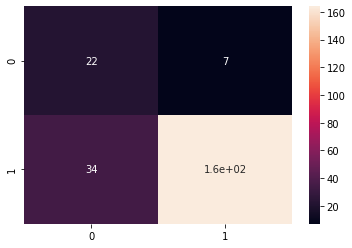

In [69]:
print("SVC Matrix : ", sn.heatmap(confusion_matrix(pred_svc, y_test), annot=True))
print("Precision : ", precision_score(pred_svc, y_test))
print("Recall : ", recall_score(pred_svc, y_test))
print("F1_Score : ", f1_score(pred_svc, y_test))

MLP Matrix :  AxesSubplot(0.125,0.125;0.62x0.755)
Precision :  0.8771929824561403
Recall :  0.8522727272727273
F1_Score :  0.8645533141210374


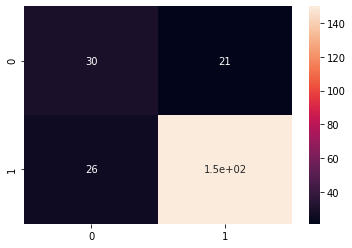

In [70]:
print("MLP Matrix : ", sn.heatmap(confusion_matrix(pred_mlp, y_test), annot=True))
print("Precision : ", precision_score(pred_mlp, y_test))
print("Recall : ", recall_score(pred_mlp, y_test))
print("F1_Score : ", f1_score(pred_mlp, y_test))

K-Nearest Neighbour Matrix :  AxesSubplot(0.125,0.125;0.62x0.755)
Precision :  0.9064327485380117
Recall :  0.8516483516483516
F1_Score :  0.8781869688385268


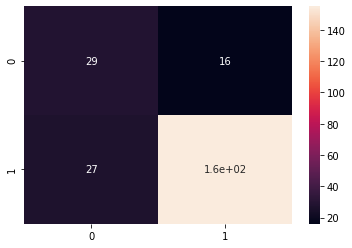

In [71]:
print("K-Nearest Neighbour Matrix : ", sn.heatmap(confusion_matrix(pred_knc, y_test), annot=True))
print("Precision : ", precision_score(pred_knc, y_test))
print("Recall : ", recall_score(pred_knc, y_test))
print("F1_Score : ", f1_score(pred_knc, y_test))

Log Regr Matrix :  AxesSubplot(0.125,0.125;0.62x0.755)
Precision :  0.9298245614035088
Recall :  0.8324607329842932
F1_Score :  0.8784530386740331


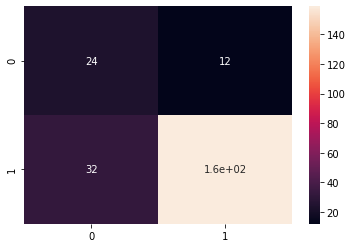

In [72]:
print("Log Regr Matrix : ", sn.heatmap(confusion_matrix(pred_logr, y_test), annot=True))
print("Precision : ", precision_score(pred_logr, y_test))
print("Recall : ", recall_score(pred_logr, y_test))
print("F1_Score : ", f1_score(pred_logr, y_test))

Decision Tree Matrix :  AxesSubplot(0.125,0.125;0.62x0.755)
Precision :  0.8421052631578947
Recall :  0.8372093023255814
F1_Score :  0.8396501457725948


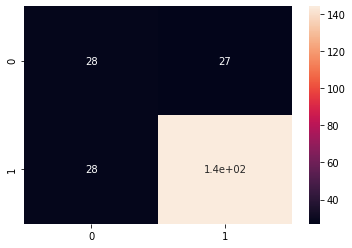

In [73]:
print("Decision Tree Matrix : ", sn.heatmap(confusion_matrix(pred_dtc, y_test), annot=True))
print("Precision : ", precision_score(pred_dtc, y_test))
print("Recall : ", recall_score(pred_dtc, y_test))
print("F1_Score : ", f1_score(pred_dtc, y_test))

Random Forest Matrix :  AxesSubplot(0.125,0.125;0.62x0.755)
Precision :  0.9064327485380117
Recall :  0.8469945355191257
F1_Score :  0.8757062146892655


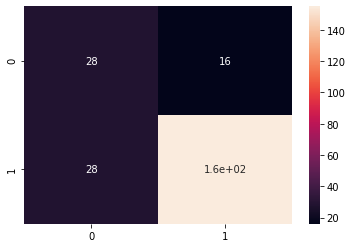

In [74]:
print("Random Forest Matrix : ", sn.heatmap(confusion_matrix(pred_rdf, y_test), annot=True))
print("Precision : ", precision_score(pred_rdf, y_test))
print("Recall : ", recall_score(pred_rdf, y_test))
print("F1_Score : ", f1_score(pred_rdf, y_test))